In [2]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from scipy import signal

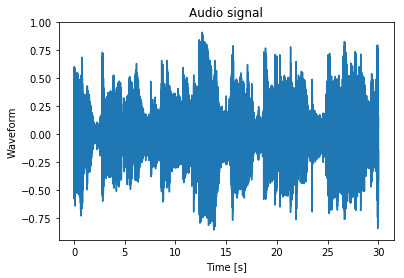

In [13]:
path = "Data/genres_original/country/country.00097.wav"
n_fft = 2048
hop_length = 512
#path = "makeit.wav"
sample, sr = librosa.load(path)
duration = np.arange(len(sample)) / sr

plt.plot(duration, sample)
plt.title("Audio signal")
plt.ylabel("Waveform")
plt.xlabel("Time [s]")
plt.show()
ipd.Audio(sample, rate=sr)

In [14]:
# onset_env = librosa.onset.onset_strength(sample, sr=sr)
# songTempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo, beats = librosa.beat.beat_track(y=sample, sr=sr)
beat_times = librosa.frames_to_time(beats, sr=sr)
print(beat_times)
clicks = librosa.clicks(beat_times, sr=sr, length=len(sample))
ipd.Audio(sample + clicks, rate=sr)

[ 0.69659864  1.2306576   1.76471655  2.27555556  2.78639456  3.29723356
  3.83129252  4.41179138  4.94585034  5.4799093   6.01396825  6.54802721
  7.05886621  7.59292517  8.10376417  8.61460317  9.14866213  9.68272109
 10.21678005 10.750839   11.30811791 11.84217687 12.37623583 12.91029478
 13.44435374 13.95519274 14.4892517  15.02331066 15.55736961 16.09142857
 16.62548753 17.13632653 17.67038549 18.20444444 18.7385034  19.29578231
 19.82984127 20.34068027 20.87473923 21.38557823 21.91963719 22.4769161
 23.01097506 23.52181406 24.05587302 24.58993197 25.07755102 25.63482993
 26.16888889 26.70294785 27.26022676 27.77106576 28.30512472 28.83918367
 29.35002268]


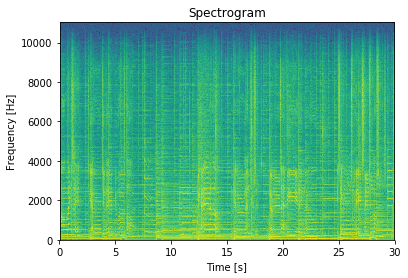

[ 0.04643991  0.11609977  0.18575964  0.2554195   0.32507937  0.39473923
  0.46439909  0.53405896  0.60371882  0.67337868  0.74303855  0.81269841
  0.88235828  0.95201814  1.021678    1.09133787  1.16099773  1.2306576
  1.30031746  1.36997732  1.43963719  1.50929705  1.57895692  1.64861678
  1.71827664  1.78793651  1.85759637  1.92725624  1.9969161   2.06657596
  2.13623583  2.20589569  2.27555556  2.34521542  2.41487528  2.48453515
  2.55419501  2.62385488  2.69351474  2.7631746   2.83283447  2.90249433
  2.9721542   3.04181406  3.11147392  3.18113379  3.25079365  3.32045351
  3.39011338  3.45977324  3.52943311  3.59909297  3.66875283  3.7384127
  3.80807256  3.87773243  3.94739229  4.01705215  4.08671202  4.15637188
  4.22603175  4.29569161  4.36535147  4.43501134  4.5046712   4.57433107
  4.64399093  4.71365079  4.78331066  4.85297052  4.92263039  4.99229025
  5.06195011  5.13160998  5.20126984  5.27092971  5.34058957  5.41024943
  5.4799093   5.54956916  5.61922902  5.68888889  5.7

In [28]:
# %% Calculate beat duration
# beatDurationSec = 60 / songTempo
# beatDurationSample = int(beatDurationSec * sr)

# win_length = sr * 0.0226  #frame length of 22.6ms
# win_length = int(win_length)
# hop_length = win_length//2

# # %% target spectrogram
spectrogram, frequencies, times, im = plt.specgram(
    sample,
    Fs=sr,
    NFFT=n_fft,
    noverlap=hop_length,
    mode="magnitude",
)
plt.title("Spectrogram")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.show()

print(times)

    
# signal = librosa.stft(sample, n_fft=n_fft, win_length=win_length, hop_length=hop_length)
# spectrogram = np.abs(signal) ** 2
# frequencys = librosa.fft_frequencies(sr=sr, n_fft=n_fft)




In [38]:
lenTimes = len(times)
lenBeatTimes = len(beat_times)
frequency_beats = [] 
min_frames_in_this_song = 5

for i in range(lenBeatTimes):
    frequency_beats.append([])

for i in range(lenBeatTimes-1):
    frames = 0
    for j in range(lenTimes-1):
        if times[j] >= beat_times[i] and  times[j] < max(beat_times[i + 1], times[j-1], times[j+1])  and frames < min_frames_in_this_song:
            print(times[j])
            frequency_beats[i].append(spectrogram[j])
            frames += 1
            
            
# for i in range(lenBeatTimes-1):
#     frames = 0
#     for j in range(lenTimes):
#         if times[j] >= beat_times[i] and times[j] < beat_times[i + 1] and frames < min_frames_in_this_song:
#             print(times[j])
#             frequency_beats[i].append(spectrogram[j])
#             frames += 1
            
# print(frequency_beats)

0.7430385487528345
0.8126984126984127
0.8823582766439909
0.9520181405895691
1.0216780045351475
1.230657596371882
1.3003174603174603
1.3699773242630386
1.4396371882086167
1.509297052154195
1.787936507936508
1.8575963718820863
1.9272562358276644
1.9969160997732427
2.066575963718821
2.2755555555555556
2.345215419501134
2.414875283446712
2.48453514739229
2.5541950113378684
2.8328344671201813
2.9024943310657596
2.972154195011338
3.0418140589569163
3.111473922902494
3.320453514739229
3.3901133786848074
3.4597732426303853
3.5294331065759637
3.599092970521542
3.877732426303855
3.947392290249433
4.017052154195011
4.08671201814059
4.156371882086168
4.435011337868481
4.504671201814059
4.574331065759637
4.6439909297052155
4.713650793650793
4.992290249433107
5.061950113378685
5.131609977324263
5.201269841269841
5.270929705215419
5.479909297052155
5.5495691609977325
5.61922902494331
5.688888888888889
5.758548752834467
6.03718820861678
6.106848072562358
6.176507936507937
6.246167800453515
6.315827664

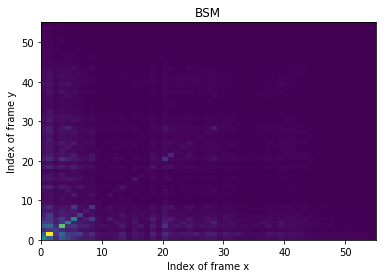

In [31]:
bsm = np.zeros((lenBeatTimes, lenBeatTimes))
for i in range(lenBeatTimes-1):
    for j in range(lenBeatTimes-1):
        for k in range(min_frames_in_this_song):
            bsm[i,j] += np.sum(frequency_beats[i][k] * frequency_beats[j][k])
            
plt.pcolormesh(bsm)
plt.title("BSM")
plt.xlabel("Index of frame x")
plt.ylabel("Index of frame y")
plt.show()

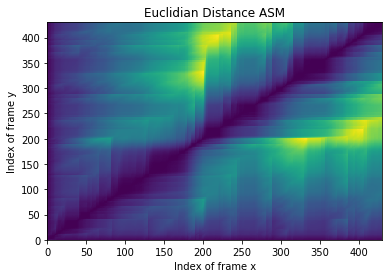

In [21]:
binsAmount = len(times)
asm = np.zeros((binsAmount, binsAmount))
# bsm = np.zeros((binsAmount, binsAmount))


def euclidianDistance(oneBin, secondBin):
    return np.sum(np.square(oneBin - secondBin)), "Euclidian Distance"

def cosineDistance(oneBin, secondBin):
    return (
        1
        - np.sum(np.square(oneBin * secondBin))
        / (np.sqrt(np.sum(np.square(oneBin))) * np.sqrt(sum(np.square(secondBin)))),
        "Cosine Distance",
    )

def kullbackLeibler(oneBin, secondBin):
    return np.sum(oneBin * np.log(oneBin / secondBin)), "Kullback-Leiber"


for x in range(binsAmount):
    thisBin = spectrogram[:, x]
    for y in range(binsAmount):
        comparedBin = spectrogram[:, y]
        asm[x, y], method = euclidianDistance(thisBin, comparedBin)
        #asm[x, y], method = cosineDistance(thisBin, comparedBin)
        #asm[x, y], method = kullbackLeibler(thisBin, comparedBin)
        asm[x, y] = asm[x, y] + np.min([asm[x-1, y-1], asm[x-1, y], asm[x, y-1]])

# for x in range(binsAmount):
#     thisBin = frequency_beats[x]
#     for y in range(binsAmount):
#         comparedBin = frequency_beats[y]
#         bsm[x, y], method = euclidianDistance(thisBin, comparedBin)
#         #asm[x, y], method = cosineDistance(thisBin, comparedBin)
#         #asm[x, y], method = kullbackLeibler(thisBin, comparedBin)        
        
plt.pcolormesh(asm)
plt.title(f"{method} ASM")
plt.xlabel("Index of frame x")
plt.ylabel("Index of frame y")
plt.show()

# plt.pcolormesh(bsm)
# plt.title(f"{method} BSM")
# plt.xlabel("Index of frame x")
# plt.ylabel("Index of frame y")
# plt.show()

# print(bsm)

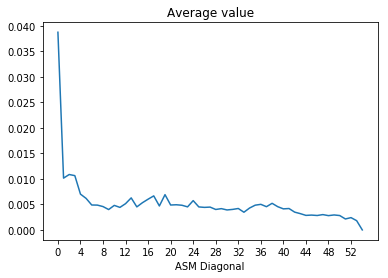

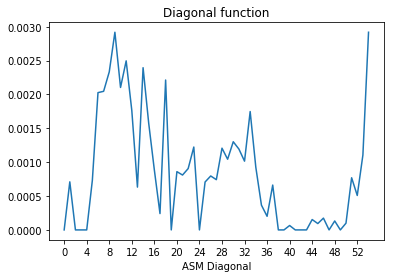

In [22]:
diagonalasNumber = len(bsm)
d = np.zeros(diagonalasNumber)
for i in range(diagonalasNumber):
    d[i] = np.average(np.diag(bsm, i))

plt.title("Average value")
plt.xlabel("ASM Diagonal")
plt.plot(d)
plt.xticks(range(0, len(d), 4))
plt.show()

# %% Calculate second function d
for i in range(diagonalasNumber):
    d[i] = -d[i] + np.max(np.abs(d))

plt.title("Diagonal function")
plt.xlabel("ASM Diagonal")
plt.plot(d)
plt.xticks(range(0, len(d), 4))
plt.show()

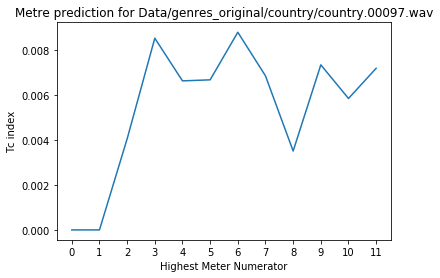

Time signature is: 6


In [23]:
highestMeterNumerator = 12
lt = int(len(bsm) / highestMeterNumerator)
t = np.zeros(highestMeterNumerator)
for c in range(2, highestMeterNumerator, 1):
    for p in range(1, lt, 1):
        t[c] += (d[p * c]) / (1 - ((p - 1) / lt))

t[0] = 0
t[1] = 0
plt.plot(t)
plt.xlabel("Highest Meter Numerator")
plt.ylabel("Tc index")
plt.title(f"Metre prediction for {path}")
plt.xticks(range(0, len(t), 1))
plt.show()

# t[0] = 0
# t[1] = 0
# plt.plot(t)
# plt.xlabel("Metre candidate")
# plt.ylabel("Tc index")
# plt.title(f"Metre prediction for {song.path.split('/')[2]}. Expected: {song.metre}")
# plt.xticks(range(0, len(t), 1))
# plt.show()

# %% detect metre
metre = np.argmax(t)
print('Time signature is:', metre)